In [2]:
from openbb_terminal.sdk import openbb
from datetime import datetime
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

In [31]:
import os
from dotenv import load_dotenv
print(os.getcwd())

load_dotenv('/Users/mark/OpenBB/Scripts/keys.env')


/Users/mark/OpenBB/Scripts


True

In [32]:
with open('keys.env', 'r') as file:
    for line in file:
        if "=" in line:
            key, _ = line.strip().split('=', 1)
            print(f"{key}=******")
        else:
            print(line.strip())


API_OPENAI_KEY=******
API_NEWS_TOKEN=******
API_KEY_FINANCIALMODELINGPREP=******
API_FRED_KEY=******


In [33]:
openbb.keys.fred(key = os.getenv('API_FRED_KEY'), persist = True)
openbb.keys.quandl(key = 'API_KEY_FINANCIALMODELINGPREP', persist = True)
openbb.keys.av(key = 'API_NEWS_TOKEN', persist = True)

'Defined, test passed'

*** ECONOMY *** 

In [21]:
help(openbb.economy)

Help on EconomyRoot in module openbb_terminal.core.sdk.models.economy_sdk_model object:

class EconomyRoot(openbb_terminal.core.sdk.sdk_helpers.Category)
 |  Economy Module
 |  
 |  Attributes:
 |      `available_indices`: Get available indices
 |  
 |      `balance`: General government deficit is defined as the balance of income and expenditure of government,
 |  
 |      `balance_chart`: General government balance is defined as the balance of income and expenditure of government,
 |  
 |      `bigmac`: Display Big Mac Index for given countries
 |  
 |      `bigmac_chart`: Display Big Mac Index for given countries
 |  
 |      `ccpi`: Inflation measured by consumer price index (CPI) is defined as the change in the prices
 |  
 |      `ccpi_chart`: Inflation measured by consumer price index (CPI) is defined as the change in the prices
 |  
 |      `country_codes`: Get available country codes for Bigmac index
 |  
 |      `cpi`: Obtain CPI data from FRED. [Source: FRED]
 |  
 |      `cp

*** INDEX ***

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

<Axes: xlabel='TIME'>

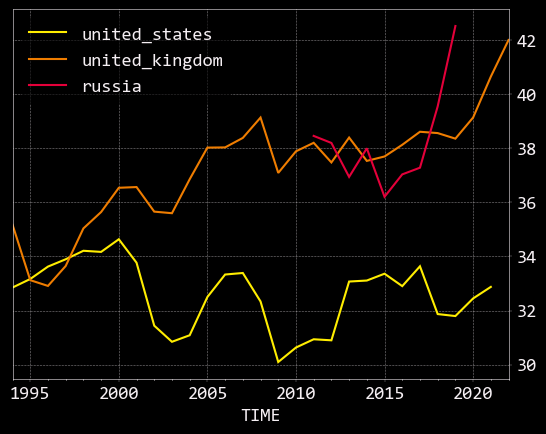

In [22]:
econ = openbb.economy.revenue(countries=['united_states', 'united_kingdom', 'russia'])
econ.plot()

In [23]:
indexes = pd.DataFrame.from_dict(openbb.economy.available_indices()).transpose()
indexes

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,name,ticker
sp500,S&P 500 Index,^GSPC
sp400,S&P 400 Mid Cap Index,^SP400
sp600,S&P 600 Small Cap Index,^SP600
sp500tr,S&P 500 TR Index,^SP500TR
sp_xsp,S&P 500 Mini SPX Options Index,^XSP
...,...,...
cboe_evz,CBOE Euro Currency Volatility Index,^EVZ
cboe_rvx,CBOE Russell 2000 Volatility Index,^RVX
move,ICE BofAML Move Index,^MOVE
dxy,US Dollar Index,DX-Y.NYB


In [24]:
# filtered indices
filtered = indexes.name.str.contains('s&p', case = False)
indexes[filtered].head(10)

,name,ticker
sp500,S&P 500 Index,^GSPC
sp400,S&P 400 Mid Cap Index,^SP400
sp600,S&P 600 Small Cap Index,^SP600
sp500tr,S&P 500 TR Index,^SP500TR
sp_xsp,S&P 500 Mini SPX Options Index,^XSP
ca_banks,S&P/TSX Composite Banks Index (CAD),TXBA.TS
ar_mervel,S&P MERVAL TR Index (USD),M.BA
eu_speup,S&P Europe 350 Index (EUR),^SPEUP
uk_spuk,S&P United Kingdom Index (PDS),^SPUK
in_bse,S&P Bombay SENSEX (INR),^BSESN


In [25]:
# one index, or multiple can be requested as single df
df = openbb.economy.index(indices = ['sp_energy_oil', 'sp_energy_equipment', 'sp_energy_ig'])

df.tail(3)

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,sp_energy_oil,sp_energy_equipment,sp_energy_ig
Date,,,
2023-09-19,777.710022,372.619995,700.750000
2023-09-20,770.229980,369.299988,694.059998
2023-09-21,765.510010,366.890015,689.780029


In [26]:
openbb.economy.index_chart(indices = ['sp_energy_oil', 'sp_energy_equipment', 'sp_energy_ig'])

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

*** PERFORMANCE ***

In [38]:
energy_perf = openbb.economy.performance(group = 'energy')
energy_perf.head()

Error: 'NoneType' object has no attribute 'findAll'

AttributeError: 'list' object has no attribute 'head'

In [28]:
sector_perf = openbb.economy.performance(group = 'sector')
sector_perf.head()

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,Name,1W,1M,3M,6M,1Y,YTD,Recom,Avg Volume,Rel Volume,Change,Volume
0,Basic Materials,-0.0353,-0.0114,-0.0155,0.0146,0.1136,0.0086,2.20,3.295400e+08,0.86,-0.0193,151150000.0
1,Communication Services,-0.0367,0.0123,0.0323,0.1814,0.2286,0.3535,1.93,5.559700e+08,0.77,-0.0105,227630000.0
2,Consumer Cyclical,-0.0568,-0.0116,-0.0072,0.1323,0.0441,0.2275,2.13,1.440000e+09,1.14,-0.0194,873410000.0
3,Consumer Defensive,-0.0161,-0.0091,-0.0333,0.0009,0.0225,-0.0236,2.26,3.416300e+08,0.95,-0.0083,172820000.0
4,Energy,-0.0229,0.0383,0.1256,0.1581,0.1494,0.0619,2.18,4.858700e+08,0.86,-0.0059,223790000.0


In [39]:
fig = px.pie(sector_perf, values='Volume', names = 'Name')
fig.update_layout(
    autosize=True,
    width=800,
    height=800
)
fig.show()

NameError: name 'sector_perf' is not defined

*** EVENTS ***

In [30]:
help(openbb.economy.events)

Help on get_economic_calendar in module openbb_terminal.economy.nasdaq_model object:

class get_economic_calendar(builtins.object)
 |  get_economic_calendar(countries: Union[List[str], str] = '', start_date: Optional[str] = None, end_date: Optional[str] = None) -> pandas.core.frame.DataFrame
 |  
 |  Get economic calendar for countries between specified dates
 |  
 |  Parameters
 |  ----------
 |  countries : [List[str],str]
 |      List of countries to include in calendar.  Empty returns all
 |  start_date : Optional[str]
 |      Start date for calendar
 |  end_date : Optional[str]
 |      End date for calendar
 |  
 |  Returns
 |  -------
 |  pd.DataFrame
 |      Economic calendar
 |  
 |  Examples
 |  --------
 |  Get todays economic calendar for the United States
 |  >>> from openbb_terminal.sdk import openbb
 |  >>> calendar = openbb.economy.events("united_states")
 |  
 |  To get multiple countries for a given date, pass the same start and end date as well as
 |  a list of countr

In [40]:
# events for the day with no parameters
openbb.economy.events()

,Time (ET),Country,Event,Actual,Consensus,Previous,Date
0,01:00,Singapore,Industrial Production,10.7%,7.5%,-10.8%,2023-10-26
1,01:00,Singapore,Industrial Production,-2.1%,-4.8%,-11.6%,2023-10-26
2,03:00,Spain,Spanish Unemployment Rate,11.84%,11.50%,11.60%,2023-10-26
3,04:30,Hong Kong,Exports,-5.3%,-,-3.7%,2023-10-26
4,04:30,Hong Kong,Imports,-0.4%,-,-0.3%,2023-10-26
...,...,...,...,...,...,...,...
60,20:30,Australia,PPI,-,-,0.5%,2023-10-26
61,20:30,Australia,PPI,-,-,3.9%,2023-10-26
62,20:30,Singapore,URA Property Index,-,0.50%,-0.20%,2023-10-26
63,21:30,China,Chinese Industrial profit YTD,-,-,-11.7%,2023-10-26


In [41]:
# specific ctry and date
openbb.economy.events(countries = ['United States'], start_date = '2023-10-26', end_date = '2023-10-26')

,Time (ET),Country,Event,Actual,Consensus,Previous,Date
0,08:30,United States,Continuing Jobless Claims,-,"1,740K","1,734K",2023-10-26
1,08:30,United States,Core Durable Goods Orders,-,0.2%,0.4%,2023-10-26
2,08:30,United States,Core PCE Prices,-,2.50%,3.70%,2023-10-26
3,08:30,United States,Durable Goods Orders,-,1.7%,0.2%,2023-10-26
4,08:30,United States,Durables Excluding Defense,-,-,-0.7%,2023-10-26
5,08:30,United States,GDP,-,4.3%,2.1%,2023-10-26
6,08:30,United States,GDP Price Index,-,2.5%,1.7%,2023-10-26
7,08:30,United States,GDP Sales,-,4.5%,2.1%,2023-10-26
8,08:30,United States,Goods Orders Non Defense Ex Air,-,0.1%,0.9%,2023-10-26
9,08:30,United States,Goods Trade Balance,-,-85.50B,-84.64B,2023-10-26


*** FRED ***

In [33]:
openbb.economy.usdli_chart()

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

In [34]:
series_ids = openbb.economy.fred_notes(search_query = 'COT')
series_ids

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,PCU33712433712481,2023-09-21,2023-09-21,Producer Price Index by Industry: Household\nF...,1984-06-01,2015-05-01,Monthly,M,Index Jun 1984=100,Index Jun 1984=100,Not Seasonally Adjusted,NSA,2015-06-15 14:28:15-05,1,1,No description provided.
1,CP0511TRM086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Furniture...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:09:07-05,3,3,The Harmonized Index of Consumer Prices catego...
2,CP0511DKM086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Furniture...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:10:04-05,3,3,The Harmonized Index of Consumer Prices catego...
3,CP1232DEM086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Other\nPe...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:07:08-05,3,3,The Harmonized Index of Consumer Prices catego...
4,CP0511DEM086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Furniture...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:10:04-05,3,3,The Harmonized Index of Consumer Prices catego...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,CP0511ROM086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Furniture...,2000-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:14:42-05,0,0,The Harmonized Index of Consumer Prices catego...
79,CP1232LUM086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Other\nPe...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:14:25-05,0,0,The Harmonized Index of Consumer Prices catego...
80,CP0511EZ19M086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Furniture...,1999-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:14:42-05,0,0,The Harmonized Index of Consumer Prices catego...
81,CP1232EU272020M086NEST,2023-09-21,2023-09-21,Harmonized Index of Consumer Prices: Other\nPe...,2000-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:10:31-05,0,0,The Harmonized Index of Consumer Prices catego...


In [35]:
series_ids = openbb.economy.fred_notes(search_query = 'offshore')
series_ids

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,IDSBMRINI1N,2023-09-21,2023-09-21,Net Issues of International Debt Securities fo...,1987-01-01,2015-04-01,Quarterly,Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2015-09-14 13:46:41-05,3,3,This series appears in Table 11b. Nationality...
1,DDDI03USA156NWDB,2023-09-21,2023-09-21,Non-Bank Financial Institutions' Assets to GDP...,1960-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:22:06-05,25,25,Total assets held by financial institutions th...
2,IBANAINIAO1N,2023-09-21,2023-09-21,Amount Outstanding of International Bonds and\...,1971-10-01,2015-04-01,Quarterly,Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2015-09-14 13:51:15-05,1,1,This series appears in Table 15b. Source Code:...
3,IMMIRIGI1N,2023-09-21,2023-09-21,Gross Issuance of International Money Market\n...,1993-07-01,2015-04-01,Quarterly,Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2015-09-14 13:41:19-05,1,1,This series appears in Table 14a. Source Code:...
4,IDSGGGAMNIAO1N,2023-09-21,2023-09-21,Amount Outstanding of International Debt\nSecu...,1993-07-01,2015-04-01,Quarterly,Q,Billions of US Dollars,Bil. of US $,Not Seasonally Adjusted,NSA,2015-09-14 13:45:39-05,1,1,This series appears in Table 12e. Source Code:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,DDDI03SVA156NWDB,2023-09-21,2023-09-21,Non-Bank Financial Institutions' Assets to GDP...,2000-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:34:23-05,0,0,Total assets held by financial institutions th...
411,DDDI03TTA156NWDB,2023-09-21,2023-09-21,Non-Bank Financial Institutions' Assets to GDP...,1960-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:34:22-05,0,0,Total assets held by financial institutions th...
412,DDDI03LYA156NWDB,2023-09-21,2023-09-21,Non-Bank Financial Institutions' Assets to GDP...,1964-01-01,2004-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:34:24-05,0,0,Total assets held by financial institutions th...
413,DDDI03EZA156NWDB,2023-09-21,2023-09-21,Non-Bank Financial Institutions' Assets to GDP...,1961-01-01,2007-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2017-08-30 08:06:28-05,0,0,Total assets held by financial institutions th...


*** MACRO *** 

In [36]:
help(openbb.economy.macro)

Help on get_aggregated_macro_data in module openbb_terminal.economy.econdb_model object:

class get_aggregated_macro_data(builtins.object)
 |  get_aggregated_macro_data(parameters: Optional[list] = None, countries: Optional[list] = None, transform: str = '', start_date: str = '1900-01-01', end_date: Optional[str] = None, symbol: str = '') -> Tuple[pandas.core.frame.DataFrame, Dict[Any, Dict[Any, Any]], str]
 |  
 |  This functions groups the data queried from the EconDB database [Source: EconDB]
 |  
 |  Parameters
 |  ----------
 |  parameters: list
 |      The type of data you wish to download. Available parameters can be accessed through economy.macro_parameters().
 |  countries : list
 |      The selected country or countries. Available countries can be accessed through economy.macro_countries().
 |  transform : str
 |      The selected transform. Available transforms can be accessed through get_macro_transform().
 |  start_date : str
 |      The starting date, format "YEAR-MONTH-D

In [37]:
countries = openbb.economy.macro_countries()
countries

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

{'Albania': 'ALL',
 'Argentina': 'ARS',
 'Australia': 'AUD',
 'Austria': 'EUR',
 'Azerbaijan': 'AZN',
 'Bangladesh': 'BDT',
 'Belarus': 'BYR',
 'Belgium': 'EUR',
 'Bhutan': 'BTN',
 'Bosnia_and_Herzegovina': 'BAM',
 'Botswana': 'BWP',
 'Brazil': 'BRL',
 'Bulgaria': 'BGN',
 'Cambodia': 'KHR',
 'Cameroon': 'XAF',
 'Canada': 'CAD',
 'Chile': 'CLP',
 'China': 'CNY',
 'Colombia': 'COP',
 'Croatia': 'HRK',
 'Cyprus': 'EUR',
 'Czechia': 'CZK',
 'Denmark': 'DKK',
 'Dominican_Republic': 'DOP',
 'Egypt': 'EGP',
 'Estonia': 'EUR',
 'European_Union': 'EUR',
 'Finland': 'EUR',
 'France': 'EUR',
 'Germany': 'EUR',
 'Greece': 'EUR',
 'Honduras': 'HNL',
 'Hong Kong': 'HKD',
 'Hungary': 'HUF',
 'India': 'INR',
 'Indonesia': 'IDR',
 'Iran': 'IRR',
 'Ireland': 'EUR',
 'Israel': 'ILS',
 'Italy': 'EUR',
 'Japan': 'JPY',
 'Kazakhstan': 'KZT',
 'Laos': 'LAK',
 'Latvia': 'EUR',
 'Lebanon': 'LBP',
 'Lithuania': 'EUR',
 'Luxembourg': 'EUR',
 'Macedonia': 'MKD',
 'Malaysia': 'MYR',
 'Malta': 'EUR',
 'Mexico': 'MX

In [38]:
parameters = pd.DataFrame.from_dict(openbb.economy.macro_parameters()).transpose()
parameters

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,name,period,description
RGDP,Real gross domestic product,Quarterly,Inflation-adjusted measure that reflects the v...
RPRC,Real private consumption,Quarterly,All purchases made by consumers adjusted by in...
RPUC,Real public consumption,Quarterly,All purchases made by the government adjusted ...
RGFCF,Real gross fixed capital formation,Quarterly,The acquisition of produced assets adjusted by...
REXP,Real exports of goods and services,Quarterly,Transactions in goods and services from reside...
RIMP,Real imports of goods and services,Quarterly,Transactions in goods and services to resident...
GDP,Gross domestic product,Quarterly,Measure that reflects the value of all goods a...
PRC,Private consumption,Quarterly,All purchases made by consumers (chain-linked ...
PUC,Public consumption,Quarterly,All purchases made by the government (chain-li...
GFCF,Gross fixed capital formation,Quarterly,The acquisition of produced assets (chain-link...


In [47]:
data,units,denomination = openbb.economy.macro(parameters = ['GDP'], countries = ['Norway','Switzerland', 'Poland', 'France', 'Italy', 'Spain'])
data.head()

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,France,Italy,Norway,Poland,Spain,Switzerland
,GDP,GDP,GDP,GDP,GDP,GDP
date,,,,,,
1995-01-01,3.015670e+11,2.396780e+11,2.378040e+11,8.118100e+10,1.127600e+11,1.019390e+11
1995-04-01,3.044340e+11,2.449740e+11,2.392110e+11,8.520600e+10,1.144010e+11,1.040130e+11
1995-07-01,3.059320e+11,2.498490e+11,2.413350e+11,9.003600e+10,1.156280e+11,1.047010e+11
1995-10-01,3.074020e+11,2.555000e+11,2.447880e+11,8.889300e+10,1.177990e+11,1.065750e+11
1996-01-01,3.111610e+11,2.586470e+11,2.565210e+11,1.004010e+11,1.194600e+11,1.036570e+11


<Axes: xlabel='date'>

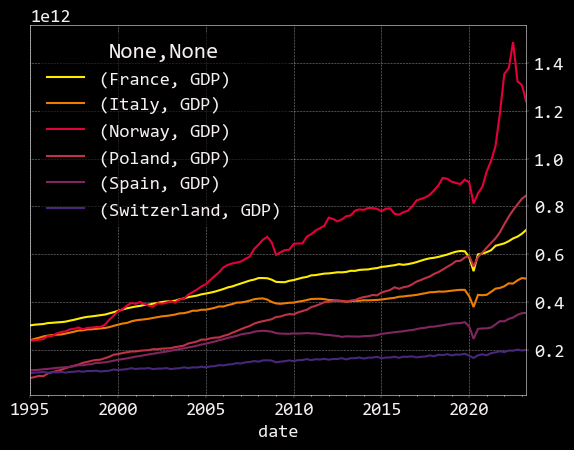

In [48]:
data.plot()

In [49]:
# Assuming data is your DataFrame

# Reset the index (so 'date' becomes a column) and then melt the data
df_melted = data.reset_index().melt(id_vars='date', value_name='GDP', var_name='variable')

# Ensure the 'country' column has the full country name
df_melted['country'] = df_melted['variable'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Drop the now redundant 'variable' column
df_melted.drop('variable', axis=1, inplace=True)

# Now you can plot the data using Plotly Express
fig = px.line(df_melted, x='date', y='GDP', color='country', title='GDP Over Time')
fig.show()


In [97]:
data,units,denomination = openbb.economy.macro(parameters = ['Y10YD'], countries = ['United States', 'Poland', 'France', 'Italy', 'Spain', 'Germany'])

data.tail(10)

,France,Germany,Italy,Poland,Spain,United States
,Y10YD,Y10YD,Y10YD,Y10YD,Y10YD,Y10YD
date,,,,,,
2022-10-01,2.77,2.19,4.53,7.82,3.29,3.98
2022-11-01,2.58,2.07,4.24,7.24,3.07,3.89
2022-12-01,2.62,2.09,4.26,6.61,3.09,3.62
2023-01-01,2.69,2.19,4.24,6.02,3.20,3.53
2023-02-01,2.87,2.37,4.27,6.18,3.39,3.75
2023-03-01,2.92,2.38,4.24,6.14,3.43,3.66
2023-04-01,2.90,2.36,4.23,6.07,3.40,3.46
2023-05-01,2.94,2.34,4.31,5.93,3.41,3.57


In [1]:
# Assuming data is your DataFrame

# Reset the index (so 'date' becomes a column) and then melt the data
df_melted = data.reset_index().melt(id_vars='date', value_name='Y10YD', var_name='variable')

# Ensure the 'country' column has the full country name
df_melted['country'] = df_melted['variable'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Drop the now redundant 'variable' column
df_melted.drop('variable', axis=1, inplace=True)

# Now you can plot the data using Plotly Express
fig = px.line(df_melted, x='date', y='Y10YD', color='country', title='Y10YD Over Time')
fig.show()


NameError: name 'data' is not defined

In [11]:
# cpi data for dif countries
cpi = openbb.economy.cpi(countries=['united_states', 'united_kingdom','china'])
cpi.head()


,china-monthly-growth_same,united_kingdom-monthly-growth_same,united_states-monthly-growth_same
1993-02-01,0.566441,3.1,3.246753
1993-03-01,1.850876,3.2,3.086863
1993-04-01,2.889392,2.6,3.225806
1993-05-01,1.497099,2.3,3.221188
1993-06-01,-0.138358,2.2,2.995720


<Axes: >

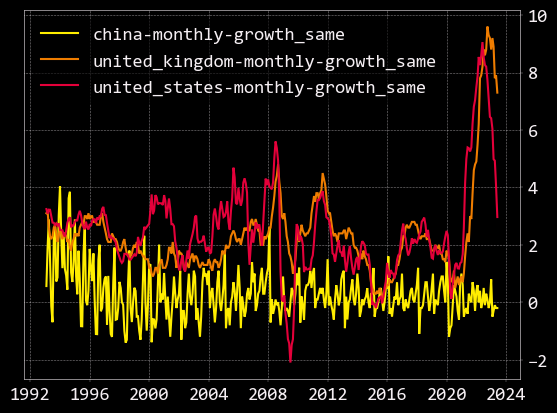

In [12]:
cpi.plot()


In [13]:
# cpi_3 = openbb.economy.cpi(countries=['united_states', 'united_kingdom','china'])
# print(cpi_3.head())
# cpi_3.plot()

<!-- map [-p {1d,1w,1m,3m,6m,1y}] [-t {GC,world,full,etf}] -->
finviz = openbb.economy.macro_chart()

In [12]:
finviz = openbb.economy.macro_chart(parameters= ['GDP'], countries=['United States'], start_date="2000-01-01")
finviz

In [13]:
finviz_near = openbb.economy.macro_chart(parameters= ['CPI'], countries=['China', 'United States'], start_date="2008-01-01")
finviz_near

In [14]:
# oomaagaya

# contracts = openbb.stocks.gov.lastcontracts()
# contracts

# summed_contracts = contracts.groupby('Agency').Amount.mean().reset_index()
# summed_contracts

# Sort the contracts DataFrame based on contract_value in descending order
# sorted_contracts = contracts.sort_values(by='Amount', ascending=False)

# Display the result


# df = openbb.stocks.load("AAPL")
# cones_df = openbb.ta.cones(data = df, lower_q = 0.10, upper_q = 0.90).reset_index()

# print(cones_df)
# print(data)

# df = px.data.wind()
# print(df)
# fig = px.bar_polar(df, r="frequency", theta="direction", color="strength", template="plotly_dark",
#             color_discrete_sequence= px.colors.sequential.Plasma_r)
# fig.show()

In [15]:
# latest contracts from gov
Latest_Contracts = openbb.stocks.gov.lastcontracts()
Latest_Contracts
    

,Date,Ticker,Amount,Description,Agency
0,2023-08-30,ABT,23300.00,ANNUAL SERVICE PROGRAM AGREEMENT FOR ABBOTT\nE...,Department of Transportation
1,2023-08-30,ABT,28750.25,INFUSION,Department of Veterans Affairs
2,2023-08-30,ACM,1046313.03,"PREPARATION OF FINAL DESIGN PLANS, SPECIFICATI...",Department of Transportation
3,2023-08-30,ACM,33787.00,PACES COST ESTIMATION TOOL LICENSES,Department of Commerce
4,2023-08-30,ALC,23960.00,ALCON EXCAVATING LLC NMSNF000345 E6,Department of Agriculture
...,...,...,...,...,...
530,2023-08-27,EXPR,572903.99,0801-081523 N88HX PKG-60918,Department of Agriculture
531,2023-08-27,MVLA,10990.00,OT : SOFTWARE RENEWAL,National Aeronautics and Space Administration
532,2023-08-27,BAH,4675833.87,CDCREADY RESPONDER TRAINING & COORDINATION SUP...,Department of Health and Human Services
533,2023-08-27,SAIC,5357.70,PROVIDE CUSTOM JAVASCRIPT AND HTML CODING SUPP...,Department of Transportation


In [16]:
agency = Latest_Contracts.groupby(Latest_Contracts.Agency).sum().reset_index()
agency.sort_values(by='Amount', ascending=True)

,Agency,Amount
21,Selective Service System,10620.00
14,Executive Office of the President,27711.30
12,Department of the Treasury,33809.00
16,Government Accountability Office,35130.00
20,Securities and Exchange Commission,37395.00
18,National Science Foundation,44000.00
19,Railroad Retirement Board,100981.93
13,Environmental Protection Agency,312565.98
0,Consumer Product Safety Commission,418858.00
8,Department of State,424520.70


In [17]:
fig = px.pie(agency, values='Amount', names = 'Agency')
fig.update_layout(
    autosize=True,
    width=800,
    height=800
)
fig.show()

In [18]:
spy_monthly = openbb.stocks.load(
    symbol = 'SPY',
    start_date = '1990-01-01',
    interval = 1440,
    prepost = False,
    source = 'Polygon',
    weekly = False,
    monthly = True,
)
spy_monthly.head(3)

API_POLYGON_KEY not defined. Set the API key under keys menu.

""


In [19]:
spy_monthly = openbb.stocks.load(
    symbol = 'SPY',
    start_date = '1990-01-01',
    interval = 1440,
    prepost = False,
    source = 'YahooFinance',
    weekly = False,
    monthly = True,
)
spy_monthly.head(3)

Loading Monthly data for SPY with starting period 1993-02-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
1993-02-01,25.047176,25.705844,24.388509,25.296402,25.296402,5417600,0.000,0.0
1993-03-01,25.385407,26.115282,25.189587,25.741444,25.741444,3019200,0.213,0.0
1993-04-01,25.898795,25.898795,24.771983,25.201244,25.201244,2697200,0.000,0.0


In [20]:
openbb.stocks.candle(data = spy_monthly, symbol = 'SPY - Monthly Candles')

In [21]:
openbb.stocks.candle('SPY', ma=[30,90])

Loading Daily data for SPY with starting period 2020-09-08.

In [22]:
openbb.stocks.search(sector = 'Energy',country='United States', query = 'oil')

                            Companies found on term oil in United States within Energy                             
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Symbol ┃ name                    ┃ country       ┃ sector ┃ industry group ┃ industry                ┃ exchange ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ AMAZ   │ Amazing Energy Oil and  │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │ Gas, Co.                │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ OILY   │ Sino American Oil       │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │ Company                 │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ OIS    │ Oil States              │ United States │ Energy │ Energy         │ Energy Equipment &      │ NYQ      │
│        │ International, Inc.     │               │        │                │ Services                │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ OOAG   │ OMDA Oil and Gas, Inc.  │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │                         │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ OOIL   │ Perkins Oil & Gas, Inc. │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │                         │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ OUTB   │ Outback Oil & Mineral   │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │ Exploration Corp.       │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ PDGO   │ Paradigm Oil and Gas,   │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │ Inc.                    │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ PTOG   │ Petrotech Oil and Gas,  │ United States │ Energy │ Energy         │ Energy Equipment &      │ PNK      │
│        │ Inc.                    │               │        │                │ Services                │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ PTRC   │ Petro River Oil Corp.   │ United States │ Energy │ Energy         │ Oil, Gas & Consumable   │ PNK      │
│        │                         │               │        │                │ Fuels                   │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ NRT    │ North European Oil      │ United States │ Energy │ Energy         │ Energy Equipment &      │ NYQ      │
│        │ Royalty Trust           │               │        │                │ Services                │          │
├────────┼─────────────────────────┼───────────────┼────────┼────────────────┼─────────────────────────┼──────────┤
│ QOIL   │ Quest Oil Corporation   │ United States │ Ene

,name,country,sector,industry_group,industry,exchange
symbol,,,,,,
AMAZ,"Amazing Energy Oil and Gas, Co.",United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK
OILY,Sino American Oil Company,United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK
OIS,"Oil States International, Inc.",United States,Energy,Energy,Energy Equipment & Services,NYQ
OOAG,"OMDA Oil and Gas, Inc.",United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK
OOIL,"Perkins Oil & Gas, Inc.",United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK
OUTB,Outback Oil & Mineral Exploration Corp.,United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK
PDGO,"Paradigm Oil and Gas, Inc.",United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK
PTOG,"Petrotech Oil and Gas, Inc.",United States,Energy,Energy,Energy Equipment & Services,PNK
PTRC,Petro River Oil Corp.,United States,Energy,Energy,"Oil, Gas & Consumable Fuels",PNK


In [24]:
filings = openbb.stocks.disc.filings()
filings.head(5)

,Ticker,CIK,Form Type,Title,URL
Date,,,,,
2023-09-08 17:25:54,DAKT,915779,10-Q,10-Q - DAKTRONICS INC /SD/ (0000915779) (Filer),https://www.sec.gov/Archives/edgar/data/915779...
2023-09-08 17:18:41,ATTO,1606457,6-K,6-K - Atento S.A. (0001606457) (Filer),https://www.sec.gov/Archives/edgar/data/160645...
2023-09-08 17:15:21,AIH,1757143,6-K,6-K - Aesthetic Medical International Holdings...,https://www.sec.gov/Archives/edgar/data/175714...
2023-09-08 17:10:33,XIN,1398453,6-K,"6-K - Xinyuan Real Estate Co., Ltd. (000139845...",https://www.sec.gov/Archives/edgar/data/139845...
2023-09-08 17:06:26,DSX,1318885,6-K,6-K - DIANA SHIPPING INC. (0001318885) (Filer),https://www.sec.gov/Archives/edgar/data/131888...


In [33]:
today = filings.filter(like = datetime(2023,9,8).strftime("%Y-%m-%d"), axis = 0)
today

,Ticker,CIK,Form Type,Title,URL
Date,,,,,
2023-09-08 17:25:54,DAKT,915779,10-Q,10-Q - DAKTRONICS INC /SD/ (0000915779) (Filer),https://www.sec.gov/Archives/edgar/data/915779...
2023-09-08 17:18:41,ATTO,1606457,6-K,6-K - Atento S.A. (0001606457) (Filer),https://www.sec.gov/Archives/edgar/data/160645...
2023-09-08 17:15:21,AIH,1757143,6-K,6-K - Aesthetic Medical International Holdings...,https://www.sec.gov/Archives/edgar/data/175714...
2023-09-08 17:10:33,XIN,1398453,6-K,"6-K - Xinyuan Real Estate Co., Ltd. (000139845...",https://www.sec.gov/Archives/edgar/data/139845...
2023-09-08 17:06:26,DSX,1318885,6-K,6-K - DIANA SHIPPING INC. (0001318885) (Filer),https://www.sec.gov/Archives/edgar/data/131888...
...,...,...,...,...,...
2023-09-08 06:02:34,KXINW,1713539,6-K,6-K - Kaixin Auto Holdings (0001713539) (Filer),https://www.sec.gov/Archives/edgar/data/171353...
2023-09-08 06:02:34,KXIN,1713539,6-K,6-K - Kaixin Auto Holdings (0001713539) (Filer),https://www.sec.gov/Archives/edgar/data/171353...
2023-09-08 06:02:29,None,1753681,10-Q,10-Q - Elite Performance Holding Corp (0001753...,https://www.sec.gov/Archives/edgar/data/175368...


In [34]:
tickers = today['Ticker'].to_list()
screener_results = openbb.stocks.ca.screener(similar = tickers, data_type = 'overview')
screener_results = screener_results.sort_values(by = ['Market Cap'], ascending = False).convert_dtypes()

screener_results.head(5)

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
61,TSM,Taiwan Semiconductor Manufacturing Company Lim...,Technology,Semiconductors,Taiwan,430320000000.0,15.33,89.64,-0.0046,5817376
26,HSBC,HSBC Holdings plc,Financial,Banks - Diversified,United Kingdom,143490000000.0,6.24,36.97,0.0027,1665127
7,BHP,BHP Group Limited,Basic Materials,Other Industrial Metals & Mining,Australia,138960000000.0,7.65,54.99,-0.0074,1970507
63,UL,Unilever PLC,Consumer Defensive,Household & Personal Products,United Kingdom,128729999999.999985,14.3,50.45,0.0056,1323793
54,RELX,RELX PLC,Industrials,Specialty Business Services,United Kingdom,64760000000.000008,29.32,33.87,0.0074,913250


In [35]:
stocktwits = openbb.stocks.ba.trending()
stocktwits = pd.DataFrame(stocktwits).sort_values(by = 'Watchlist Count', ascending = False)
tickers = stocktwits['Ticker'].to_list()
stocktwits.head(10)

,Ticker,Watchlist Count,Name
0,ADA.X,115246,Cardano
3,XLM.X,55247,Stellar Lumens
14,ALGO.X,29287,Algorand
26,HTZGQ,24624,"Hertz Global Holdings, Inc."
12,UWMC,22837,UWM Holdings Corporation - Ordinary Shares - C...
9,VGX.X,11047,Voyager Token
29,CLDX,9812,Celldex Therapeutics Inc.
10,NEM,9040,Newmont Corp
23,SC.X,8667,Siacoin
6,SMH,8321,VanEck Semiconductor ETF


In [36]:
screener_results = openbb.stocks.ca.screener(similar = tickers, data_type = 'overview')
screener_results = screener_results.sort_values(by = ['Market Cap'], ascending = False)

screener_results.head(5)

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
9,NEM,Newmont Corporation,Basic Materials,Gold,USA,3.086000e+10,NaN,38.73,0.0096,6469751.0
8,LAMR,Lamar Advertising Company,Real Estate,REIT - Specialty,USA,8.790000e+09,21.04,86.47,-0.0110,567690.0
14,UWMC,UWM Holdings Corporation,Financial,Mortgage Finance,USA,8.520000e+09,69.47,5.28,-0.0240,805804.0
12,SMAR,Smartsheet Inc.,Technology,Software - Application,USA,5.680000e+09,NaN,43.03,0.0662,9678284.0
16,WU,The Western Union Company,Financial,Credit Services,USA,4.730000e+09,6.48,12.78,0.0095,6356654.0


In [37]:
openbb.stocks.fa.sec(symbol = 'WMT')

,Company Name,Reporting Owner,Form Type,Period,View
Filed,,,,,
09/06/2023,Walmart Inc.,,4,09/01/2023,https://app.quotemedia.com/data/downloadFiling...
09/01/2023,Walmart Inc.,,10-Q,07/31/2023,https://app.quotemedia.com/data/downloadFiling...
08/25/2023,Walmart Inc.,,4,08/23/2023,https://app.quotemedia.com/data/downloadFiling...
08/25/2023,Walmart Inc.,,4,08/24/2023,https://app.quotemedia.com/data/downloadFiling...
08/22/2023,Walmart Inc.,,8-K,08/22/2023,https://app.quotemedia.com/data/downloadFiling...
08/17/2023,Walmart Inc.,,4,08/15/2023,https://app.quotemedia.com/data/downloadFiling...
08/17/2023,Walmart Inc.,,8-K,08/17/2023,https://app.quotemedia.com/data/downloadFiling...
08/16/2023,Walmart Inc.,,8-K,08/14/2023,https://app.quotemedia.com/data/downloadFiling...
08/03/2023,Walmart Inc.,,4,08/01/2023,https://app.quotemedia.com/data/downloadFiling...


In [41]:
openbb.stocks.ins.lins(symbol = 'SMH')

No insider information found for SMH.

""


In [42]:
openbb.stocks.ca.income(similar = ['WMT', 'TGT', 'AMZN'], quarter = True)

Other available quarterly timeframes are: 31-Jul-2022, 31-Oct-2022, 31-Jan-2023, 30-Apr-2023, 31-Jul-2023

,WMT (31-Jul-2023),TGT (31-Jul-2023),AMZN (30-Jun-2023)
Item,,,
Sales/Revenue,161.63B,24.77B,134.38B
Sales Growth,6.13%,-2.17%,5.52%
Cost of Goods Sold (COGS) incl. D&A,121.85B,18.39B,69.37B
COGS Growth,5.70%,-3.04%,2.33%
COGS excluding D&A,118.95B,17.71B,57.78B
Depreciation & Amortization Expense,2.91B,683M,11.59B
Depreciation,2.91B,,
Amortization of Intangibles,,,
Gross Income,39.78B,6.38B,65.01B


In [43]:
openbb.stocks.fa.ratios(symbol = 'WMT')

Fiscal Date Ending,2023,2022,2021,2020,2019
Period,FY,FY,FY,FY,FY
Current ratio,0.821076,0.927797,0.972173,0.794524,0.798908
Quick ratio,0.181899,0.263679,0.261827,0.202455,0.180763
Cash ratio,0.096098,0.168919,0.191494,0.121674,0.099668
Days of sales outstanding,4.736786,5.276611,4.253484,4.377514,4.458151
Days of inventory outstanding,44.531604,48.080455,39.033546,41.101291,41.936525
Operating cycle,49.26839,53.357065,43.287031,45.478806,46.394676
Days of payables outstanding,42.50558,47.016935,42.673864,43.448879,44.580471
Cash conversion cycle,6.76281,6.340131,0.613167,2.029926,1.814205
Gross profit margin,0.241405,0.250987,0.248298,0.246885,0.250977


In [44]:
ratios = openbb.stocks.fa.ratios(symbol = 'WMT', limit = 20)
ratios.filter(like = 'Price earnings to growth ratio', axis = 0)

Fiscal Date Ending,2023,2022,2021,2020,2019
Price earnings to growth ratio,-2.695261,10.475261,-3.385323,0.170047,-1.370786


In [15]:
b = openbb.economy.usbonds()
print(type(b))
b

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

<class 'pandas.core.frame.DataFrame'>


--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,,Rate (%),Yld (%),Yld Chg (%)
0,30-Year Bond,4.125,4.392,-0.036
1,10-Year Note,3.875,4.320,-0.044
2,7-Year Note,4.125,4.417,-0.048
3,5-Year Note,4.375,4.470,-0.045
4,3-Year Note,4.625,4.733,-0.054
5,2-Year Note,5.000,5.045,-0.060
6,1-Year Bill,0.000,5.435,-0.011
7,6-Month Bill,0.000,5.539,0.023
8,3-Month Bill,0.000,5.482,0.033
9,1-Month Bill,0.000,5.391,-0.003


In [14]:
openbb.economy.glbonds()

--- Logging error ---
Traceback (most recent call last):
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 74, in emit
    self.doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/site-packages/openbb_terminal/core/log/generation/path_tracking_file_handler.py", line 169, in doRollover
    super().doRollover()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/handlers.py", line 408, in doRollover
    self.stream = self._open()
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/logging/__init__.py", line 1175, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding,
FileNotFoundError: [Errno 2] No such file or directory: '/Users/mark/OpenBBUserData/logs/60a48da2-eacb-40f1-8aaa-68b83be9d8dc/gst_packaged_pypi_a31bb74e-39e0-446d-8f7d-dd1a0534bf6e-1695090243'
Call stack:
  File "/Users/mark/opt/anaconda3/envs/obb/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, m

,,Rate (%),Yld (%),Yld Chg (%)
0,U.S. 10 Year Treasury Note,3.875,4.365,0.001
1,Germany 10 Year Government Bond,2.600,2.742,0.031
2,U.K. 10 Year Gilt,4.250,4.343,-0.048
3,Japan 10 Year Government Bond,0.400,0.726,0.008
4,Australia 10 Year Government Bond,3.000,4.234,0.054
5,China 10 Year Government Bond,2.670,2.698,0.002
